<a href="https://colab.research.google.com/github/adityapatil4141/Traffic-sign-classification-using-CNN/blob/main/Traffic_sign_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed

100% 4.16G/4.16G [03:26<00:00, 21.7MB/s]
100% 4.16G/4.16G [03:26<00:00, 21.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/traffic-signs-preprocessed.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df1 = pd.read_pickle("/content/data8.pickle")

In [6]:
df1.keys()

dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test'])

In [7]:
print('x_train shape =',df1['x_train'].shape)
print('x_test shape =',df1['x_test'].shape)
# print('labels shape =',df1['labels'].shape)
print('y_test shape =',df1['y_test'].shape)
print('y_validation shape =',df1['y_validation'].shape)
print('y_train shape =',df1['y_train'].shape)
print('x_validation shape =',df1['x_validation'].shape)

x_train shape = (86989, 1, 32, 32)
x_test shape = (12630, 1, 32, 32)
y_test shape = (12630,)
y_validation shape = (4410,)
y_train shape = (86989,)
x_validation shape = (4410, 1, 32, 32)


In [8]:
x_train = df1['x_train']
x_test = df1['x_test']
y_train = df1['y_train']
y_test = df1['y_test']
x_val = df1['x_validation']
y_val = df1['y_validation']

In [9]:
# Our x_train is not in format(x_train shape = (86989, 1, 32, 32)) to feed to deep network
# correct format should be ((86989,32, 32,1))

x_train = x_train.swapaxes(1,2)
x_train.shape
# We swaped nos of axes 1 and 2


(86989, 32, 1, 32)

In [10]:
#now swap 2nd and 3rd axes to get shape in perfect format
x_train = x_train.swapaxes(2,3)
x_train.shape
x_train.shape

(86989, 32, 32, 1)

In [11]:
# Now similarly with x_val:(x_validation shape = (4410, 1, 32, 32))
x_val = x_val.swapaxes(1,2)

In [12]:
x_val = x_val.swapaxes(2,3)
x_val.shape

(4410, 32, 32, 1)

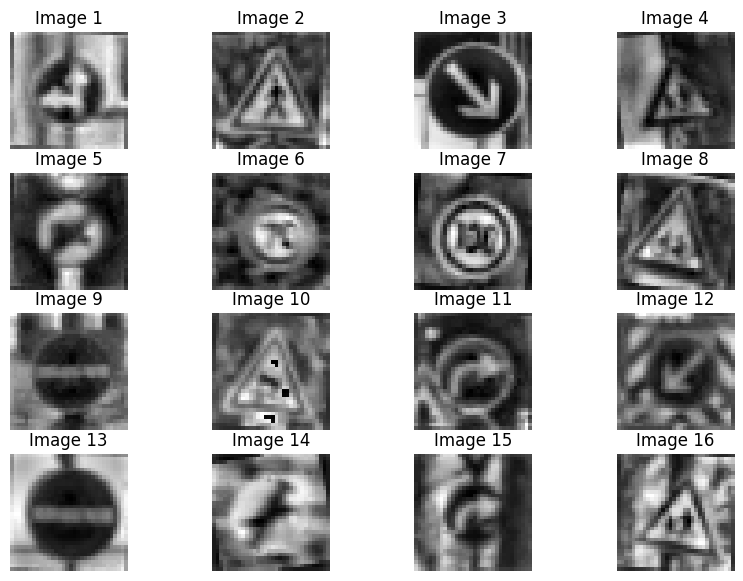

In [13]:
# Visualization :

plt.figure(figsize=(10, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)  # Adjust the subplot layout as needed
    plt.imshow(x_train[i].squeeze(), cmap='gray')  # Squeeze the channel dimension if it's 1
    plt.axis('off')
    plt.title(f'Image {i+1}')


plt.show()

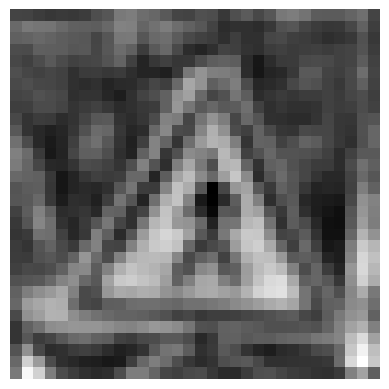

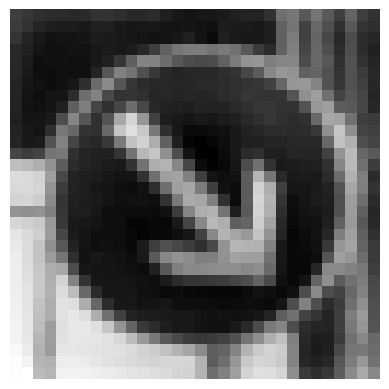

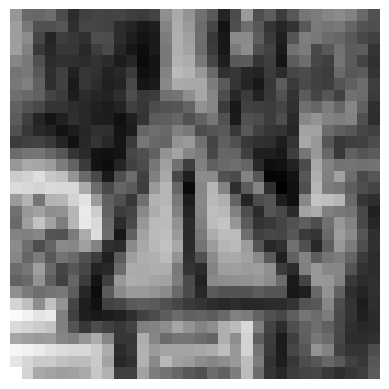

In [14]:
img_list = [1,2,17]

for i in img_list:
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')
  plt.show()

In [15]:
import tensorflow as tf

In [16]:
def resize(img):
  numberofimage = img.shape[0]

  new_array = np.zeros((numberofimage,64,64,1))
  for i in range(numberofimage):
    new_array[i] = tf.image.resize(img[i],(64,64))

  return new_array

In [17]:
x_train_resized = resize(x_train)
x_val_resized = resize(x_val)

In [18]:
from keras.utils import to_categorical

In [19]:
numofclasses = 43
y_train = to_categorical(y_train,num_classes=numofclasses)
y_val = to_categorical(y_val,num_classes=numofclasses)

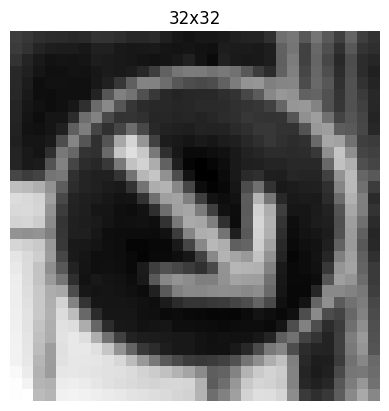

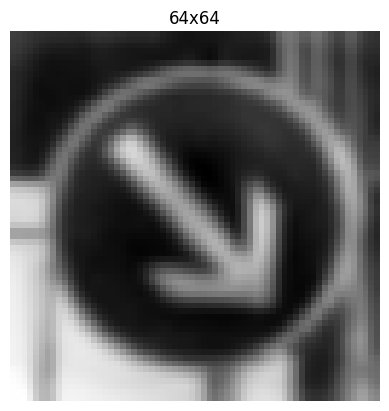

In [20]:
plt.imshow(x_train[2],cmap='gray')
plt.title("32x32")
plt.axis("off")
plt.show()

plt.imshow(x_train_resized[2],cmap='gray')
plt.title("64x64")
plt.axis("off")
plt.show()

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D

In [22]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2 ,padding='same'))
model.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu',))
model.add(Dropout(0.5))
model.add(Dense(units=numofclasses,activation='softmax'))


In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(x_train_resized,y_train,batch_size=512,epochs=10,verbose=True,validation_data=(x_val_resized,y_val))

Epoch 1/10
170/170 [==============================] - 33s 144ms/step - loss: 1.7954 - accuracy: 0.5068 - val_loss: 0.4388 - val_accuracy: 0.8721
Epoch 2/10
170/170 [==============================] - 20s 119ms/step - loss: 0.3960 - accuracy: 0.8814 - val_loss: 0.1898 - val_accuracy: 0.9390
Epoch 3/10
170/170 [==============================] - 21s 121ms/step - loss: 0.2038 - accuracy: 0.9393 - val_loss: 0.1770 - val_accuracy: 0.9599
Epoch 4/10
170/170 [==============================] - 20s 120ms/step - loss: 0.1336 - accuracy: 0.9601 - val_loss: 0.1251 - val_accuracy: 0.9703
Epoch 5/10
170/170 [==============================] - 20s 118ms/step - loss: 0.0994 - accuracy: 0.9705 - val_loss: 0.1323 - val_accuracy: 0.9683
Epoch 6/10
170/170 [==============================] - 20s 119ms/step - loss: 0.0781 - accuracy: 0.9761 - val_loss: 0.1421 - val_accuracy: 0.9739
Epoch 7/10
170/170 [==============================] - 20s 119ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.1247 - val_ac

#Hyperparameter tuning

In [25]:
def build_model(hp):
  model2 = Sequential()

  model2.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu',input_shape=(64,64,1)))
  model2.add(MaxPool2D(pool_size=(2,2),strides=2 ,padding='same'))
  model2.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu'))
  model2.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model2.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu'))
  model2.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model2.add(Conv2D(64,kernel_size=(4,4),padding='same',activation='relu'))
  model2.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model2.add(Flatten())

  if i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    model2.add(
        Dense(
            hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
            activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))



    model2.add(
        Dropout(hp.Choice('val'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
            ))


  model2.add(Dense(units=43,activation='softmax'))


  model2.compile(loss='categorical_crossentropy',optimizer=hp.Choice('optimizer',values=['adam','rmsprop','adadelta','sgd']) ,metrics=['accuracy'])
  return model2

In [26]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [27]:
import kerastuner as kt

<ipython-input-27-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [28]:
from kerastuner.tuners import RandomSearch

In [29]:
tuner = kt.RandomSearch(build_model,objective="val_accuracy",max_trials=3,directory='mydir',project_name='tuning')

In [30]:
tuner.search(x_train_resized,y_train,epochs=10,validation_data=(x_val_resized,y_val))

Trial 3 Complete [00h 04m 43s]
val_accuracy: 0.9795918464660645

Best val_accuracy So Far: 0.9795918464660645
Total elapsed time: 00h 14m 59s


In [31]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5, 'optimizer': 'adam'}

In [32]:
model2 = tuner.get_best_models(num_models=1)[0]

In [33]:
from keras.callbacks import EarlyStopping


In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
model2.fit(x_train_resized,y_train,epochs=100,initial_epoch=10,validation_data=(x_val_resized,y_val),callbacks=[early_stopping])

Epoch 11/100
2719/2719 [==============================] - 39s 14ms/step - loss: 0.0241 - accuracy: 0.9946 - val_loss: 0.1419 - val_accuracy: 0.9791
Epoch 12/100
2719/2719 [==============================] - 27s 10ms/step - loss: 0.0252 - accuracy: 0.9944 - val_loss: 0.2910 - val_accuracy: 0.9764
Epoch 13/100
2719/2719 [==============================] - 27s 10ms/step - loss: 0.0228 - accuracy: 0.9948 - val_loss: 0.1892 - val_accuracy: 0.9771
Epoch 14/100
2719/2719 [==============================] - 29s 11ms/step - loss: 0.0223 - accuracy: 0.9956 - val_loss: 0.2592 - val_accuracy: 0.9778
Epoch 15/100
2719/2719 [==============================] - 27s 10ms/step - loss: 0.0252 - accuracy: 0.9951 - val_loss: 0.2011 - val_accuracy: 0.9791
Epoch 16/100
2719/2719 [==============================] - 27s 10ms/step - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.2765 - val_accuracy: 0.9755
Epoch 17/100
2719/2719 [==============================] - 27s 10ms/step - loss: 0.0235 - accuracy: 0.9958 - val_

# We have achieved 98% accuracy

In [68]:
import cv2

In [69]:
test_img= cv2.imread('/content/right.png')

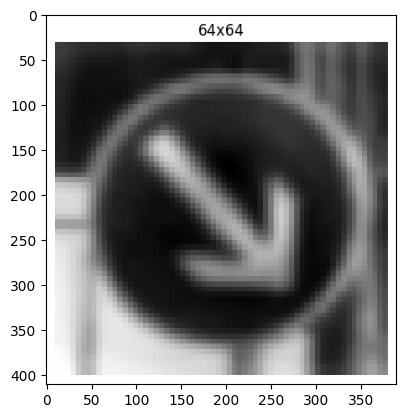

In [70]:
plt.imshow(test_img)


In [71]:
test_img.shape


(411, 389, 3)

In [75]:
print(test_img.shape)
print(test_img.size)


(411, 389, 3)
479637


In [78]:
import cv2

# Assuming img is your original image
resized_img = cv2.resize(test_img, (64, 64))
# reshaped_img = resized_img.reshape((64, 64, 3))


In [83]:
import cv2
import numpy as np

# Assuming img is your input image with shape (64, 64, 3)
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)  # Convert RGB image to grayscale
input_data = gray_img.reshape((1, 64, 64, 1))  # Add a channel dimension

# Now input_data has the shape (1, 64, 64, 1), matching the expected input shape


In [85]:
input_data.shape

(1, 64, 64, 1)

In [87]:
predictions=model2.predict(input_data)


1/1 [==============================] - 0s 405ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [1]:
predicted_class = np.argmax(predictions)


NameError: name 'np' is not defined